In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
import seaborn as sns

In [ ]:
from google.colab import drive 

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/"My Drive/Colab Notebooks/"

/content/drive/My Drive/Colab Notebooks


In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')

In [ ]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


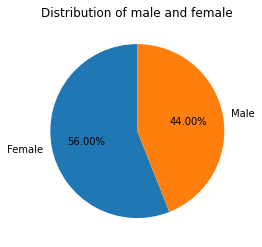

In [ ]:
gender=dataset.Gender.value_counts()
gender_label=['Female','Male']
plt.pie(gender, labels=gender_label, autopct='%0.2f%%',startangle=90)
plt.title('Distribution of male and female')
plt.show()

Text(0.5, 1.0, 'Age distribution of customers')

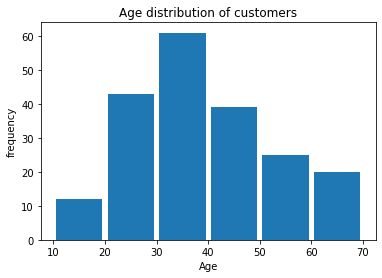

In [ ]:
bin_list=[10,20,30,40,50,60,70]
plt.hist(dataset['Age'], bins=bin_list, rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('frequency')
plt.title('Age distribution of customers')


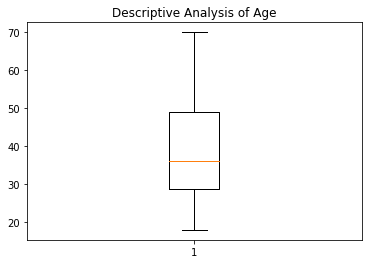

In [ ]:
plt.boxplot(dataset["Age"])
plt.title('Descriptive Analysis of Age')
plt.show()

Text(0.5, 1.0, 'Annual income of customers')

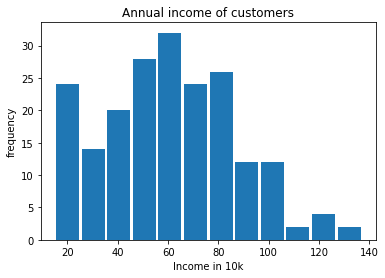

In [ ]:
plt.hist(dataset['Annual Income (k$)'], bins=12, rwidth=0.9)
plt.xlabel("Income in 10k")
plt.ylabel("frequency")
plt.title('Annual income of customers')


Text(0.5, 1.0, 'Spending Score of customers')

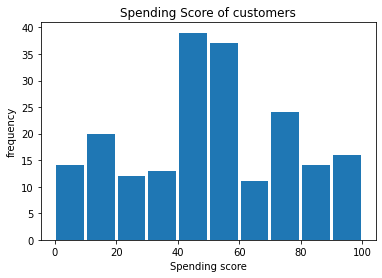

In [ ]:
plt.hist(dataset['Spending Score (1-100)'], bins=[0,10,20,30,40,50,60,70,80,90,100], rwidth=0.9)
plt.xlabel("Spending score")
plt.ylabel("frequency")
plt.title('Spending Score of customers')


In [ ]:
x=dataset.iloc[:,[3, 4]].values

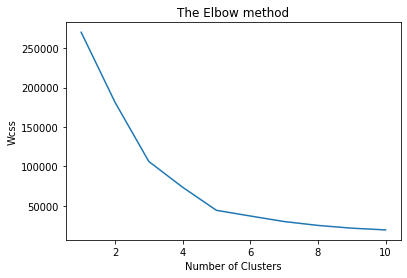

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

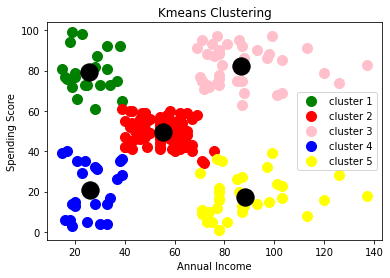

In [ ]:
plt.scatter(x[y_kmeans==0, 0],x[y_kmeans==0, 1], s=100,c='green', label='cluster 1')
plt.scatter(x[y_kmeans==1, 0],x[y_kmeans==1, 1], s=100,c='red', label='cluster 2')
plt.scatter(x[y_kmeans==2, 0],x[y_kmeans==2, 1], s=100,c='pink', label='cluster 3')
plt.scatter(x[y_kmeans==3, 0],x[y_kmeans==3, 1], s=100,c='blue', label='cluster 4')
plt.scatter(x[y_kmeans==4, 0],x[y_kmeans==4, 1], s=100,c='yellow',label='cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='black')
plt.title('Kmeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()